In [1]:
from constants import *
from model import *
from preprocess import *
from train import *
from classifier import *
from util import *

markers, markers_all, raw_mixes = get_markers_mixes()
true_proportions = get_true_proportions()

x_train, x_test, prop_train, prop_test = preprocess_mixes(markers_all, raw_mixes, true_proportions, True)

x_train_list = [x_train[markers[i]] for i in range(K)]
x_test_list = [x_test[markers[i]] for i in range(K)]

model = VAE(N_COL)
compile(model)


2023-06-17 15:32:53.217124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 15:33:02.435935: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train(model, x_train_list, x_test_list)

In [3]:
z_train = model.concat([encoder.predict(x_train_list[i]) for i,encoder in enumerate(model.encoders)])
z_test = model.concat([encoder.predict(x_test_list[i]) for i,encoder in enumerate(model.encoders)])

4/4 [==============================] - 0s 2ms/step


In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
pca = PCA(n_components=3)
pca.fit(tf.concat([z_train, z_test], axis=0))
z_train_pca = pca.transform(z_train)
pc1_train, pc2_train, pc3_train = zip(*z_train_pca)

Text(0.5, 0.92, '3D PCA of latent space of training data')

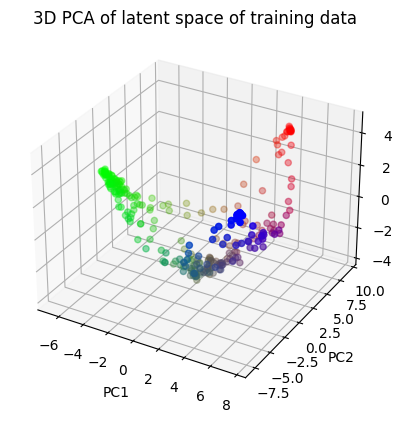

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pc1_train,pc2_train,pc3_train,c=prop_train.to_numpy())
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA of latent space of training data")

Text(0.5, 1.0, 'PCA of latent space of training data')

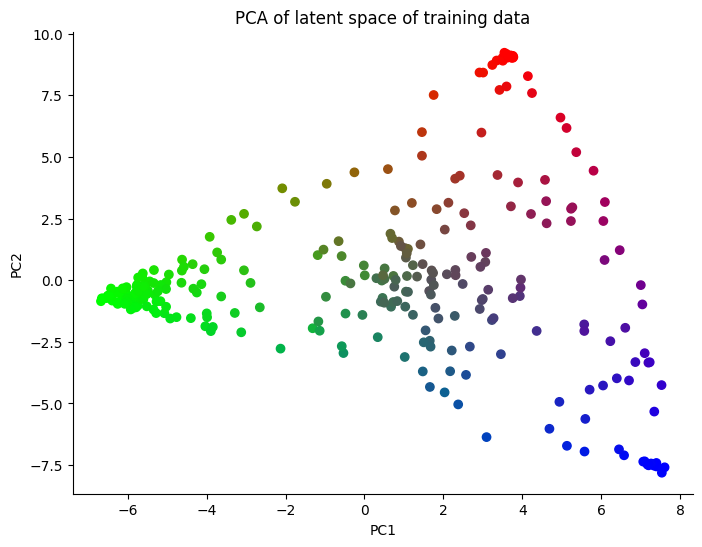

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(pc1_train,pc2_train,c=prop_train.to_numpy())
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("PCA of latent space of training data")

In [9]:
pca.fit(z_test)
z_test_pca = pca.transform(z_test)
pc1_test, pc2_test, pc3_test = zip(*z_test_pca)

Text(0.5, 0.92, '3D PCA of latent space of test data')

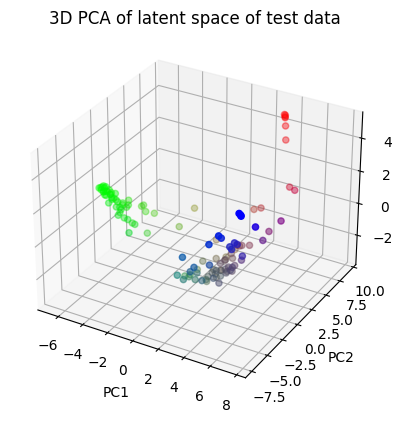

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pc1_test,pc2_test,pc3_test,c=prop_test.to_numpy())
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA of latent space of test data")

Text(0.5, 1.0, 'PCA of latent space of test data')

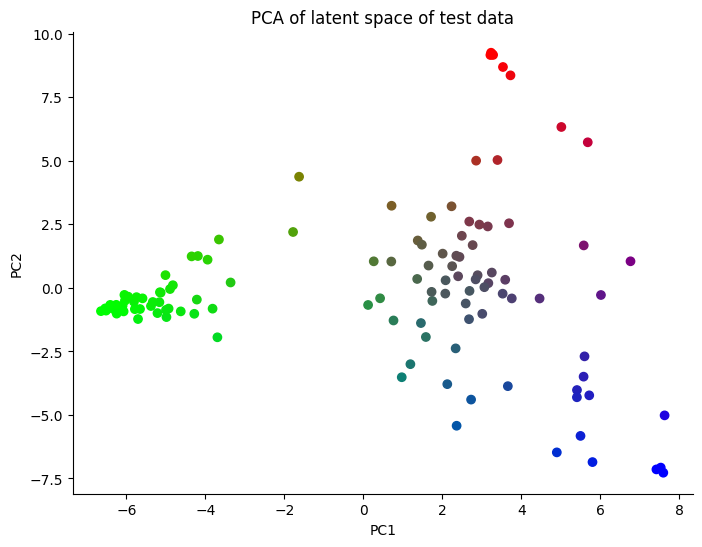

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(pc1_test,pc2_test,c=prop_test.to_numpy())
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("PCA of latent space of test data")